In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from processing.kinematics import normalize_dPhi, phi, mass, eta
from plotting import histos

In [2]:
base_paths = [
    "../reconstructions/SM_spin-ON_100k", "../reconstructions/SM_spin-OFF_100k"
]
reco_names = [
    "p_top", "p_l_t", "p_b_t", "p_nu_t",
    "p_tbar", "p_l_tbar", "p_b_tbar", "p_nu_tbar", "idx", "weight"
]

recos = dict()
for path in base_paths:
    batches = {name: [] for name in reco_names}
    for batch_idx in range(10):
        for name in reco_names:
            batches[name].append(np.load(os.path.join(path, f"{name}_batch_{batch_idx}.npy")))
    recos[os.path.basename(path)] = {
        name: np.concatenate(batches, axis=0) for name, batches in batches.items()
    }

## ATLAS Results
### $\Delta \phi(l^{+}, l^{-})$

+ m_tt < 450 GeV
+ 450 < m_tt < 550 
+ 550 < m_tt < 800
+ m_tt > 800

In [3]:
dPhi_ll = dict()
for name, reco in recos.items():
    phi_l_t = phi(reco["p_l_t"])
    phi_l_tbar = phi(reco["p_l_tbar"])
    dPhi_ll[name] = normalize_dPhi(phi_l_tbar - phi_l_t).reshape(-1, 1)

../plotting/histos.py:161: UserWarning: The handle <BarContainer object of 8 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


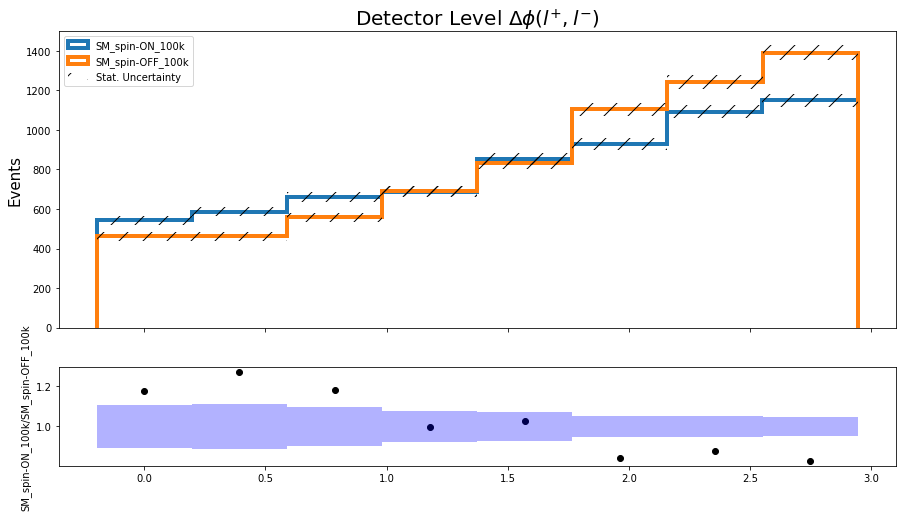

In [4]:
values = list(dPhi_ll.values())
labels = list(dPhi_ll.keys())
histos.ratio_hist(
    processes_q=values,
    hist_labels=labels,
    reference_label=labels[1],
    n_bins=8,
    hist_range=None,
    title=r"Detector Level $\Delta \phi(l^{+}, l^{-})$"
)

### $m_{t\bar{t}}$

In [5]:
m_tt = dict()
for name, reco in recos.items():
    m_tt[name] = mass(reco["p_top"]) + mass(reco["p_tbar"])

../plotting/histos.py:161: UserWarning: The handle <BarContainer object of 4 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


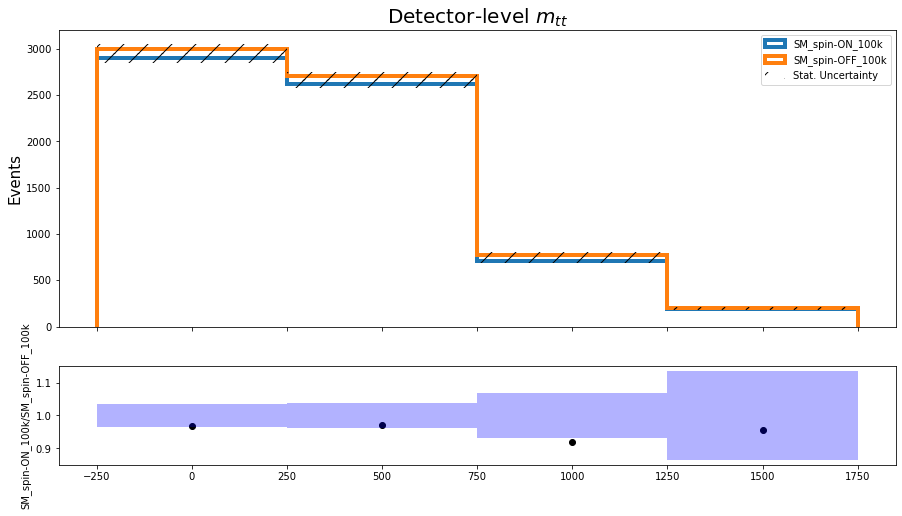

In [6]:
values = list(m_tt.values())
labels = list(m_tt.keys())
histos.ratio_hist(
    processes_q=values,
    hist_labels=labels,
    reference_label=labels[1],
    n_bins=4,
    hist_range=(0, 2000),
    title=u"Detector-level $m_{tt}$"
)

### Binned $\Delta \phi(l^{+}, l^{-})$

+ m_tt < 450 GeV
+ 450 < m_tt < 550 
+ 550 < m_tt < 800
+ m_tt > 800

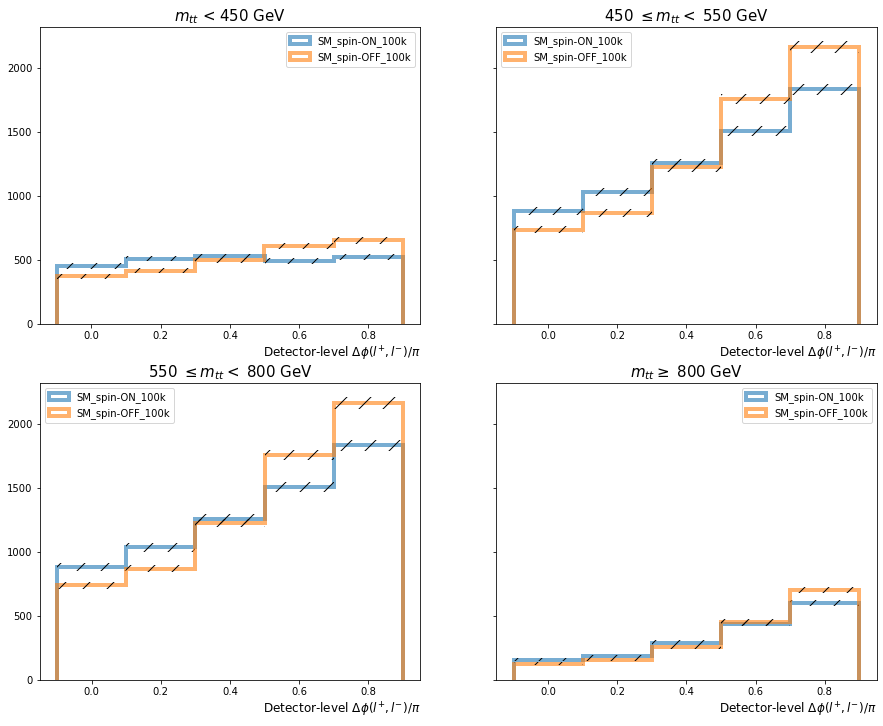

In [7]:
titles = {
    "x<450": u"$m_{tt}$ < 450 GeV",
    "450<x<550": u"450 $\leq m_{tt} <$ 550 GeV",
    "550<x<800": u"550 $\leq m_{tt} <$ 800 GeV",
    "x>800": u"$m_{tt} \geq$ 800 GeV"
}

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), sharey=True)
fig.set_facecolor("white")

for name, m_tt_vals in m_tt.items():
    masks = {
        "x<450": m_tt_vals < 450,
        "450<x<550": (450 <= m_tt_vals) + (m_tt_vals < 550),
        "550<x<800": (550 <= m_tt_vals) + (m_tt_vals < 800),
        "x>800": m_tt_vals > 800
    }
    for idx, (bin_name, mask) in enumerate(masks.items()):
        x = idx // 2
        y = idx % 2
        ax[x, y] = histos.hist_var(dPhi_ll[name][mask] / np.pi, ax=ax[x, y], bins=5, label=name)
        ax[x, y].set_xlabel(
            u"Detector-level $\Delta\phi(l^{+}, l^{-})/\pi$",
            fontsize=12,
            horizontalalignment='right',
            x=1.0
        )
        ax[x, y].set_title(titles[bin_name], fontsize=15)
        ax[x, y].legend()

### $\Delta \eta(l^{+}, l^{-})$

../plotting/histos.py:161: UserWarning: The handle <BarContainer object of 10 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


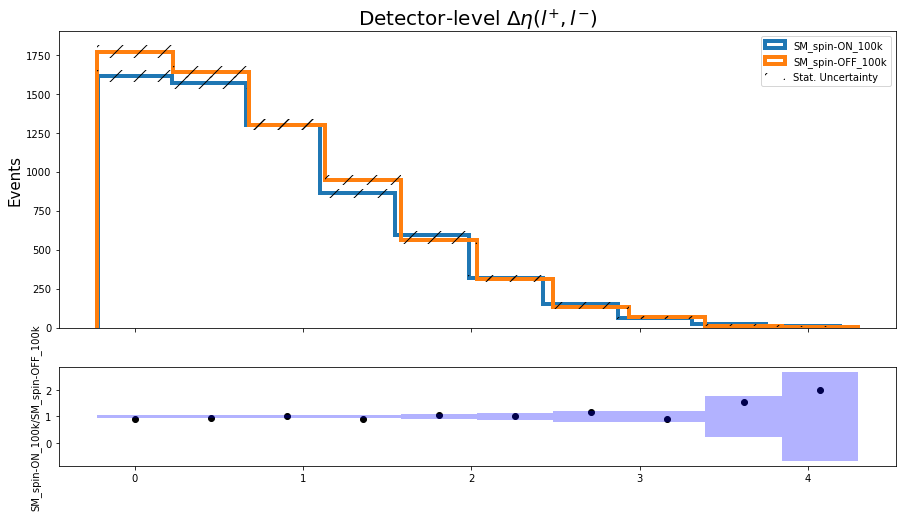

In [8]:
dEta_ll = dict()
for name, reco in recos.items():
    eta_l_t = eta(reco["p_l_t"])
    eta_l_tbar = eta(reco["p_l_tbar"])
    dEta_ll[name] = np.abs(eta_l_tbar - eta_l_t).reshape(-1, 1)
    
values = list(dEta_ll.values())
labels = list(dEta_ll.keys())
histos.ratio_hist(
    processes_q=values,
    hist_labels=labels,
    reference_label=labels[1],
    n_bins=10,
    hist_range=None,
    title=u"Detector-level $\Delta\eta(l^{+}, l^{-})$"
)